# Introdução a raspagem

## requests-html

Vamos utilizar a biblioteca [requests_html](https://github.com/kennethreitz/requests-html). 
Ela tem suporte a:
* JavaScript
* Seletores CSS
* Seletores XPath
* Mock de user-agent (igual a um browser de verdade)
* Segue os redirects das páginas automaticamente
* Mesma experiência de utilizar a biblioteca `requests`
* Entre outras coidas...

Caso não tenha o `requests-html` instalado, execute o bloco abaixo:

In [1]:
# !pip install requests-html 

Antes de começar a nossa raspagem, vamos definir um site para raspar. Nesse exemplo o objetivo é obter a lista de parlamentares no estado de Pernambuco. Essa informação temos no Wikipedia (por exemplo nessa [página](https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Pernambuco))

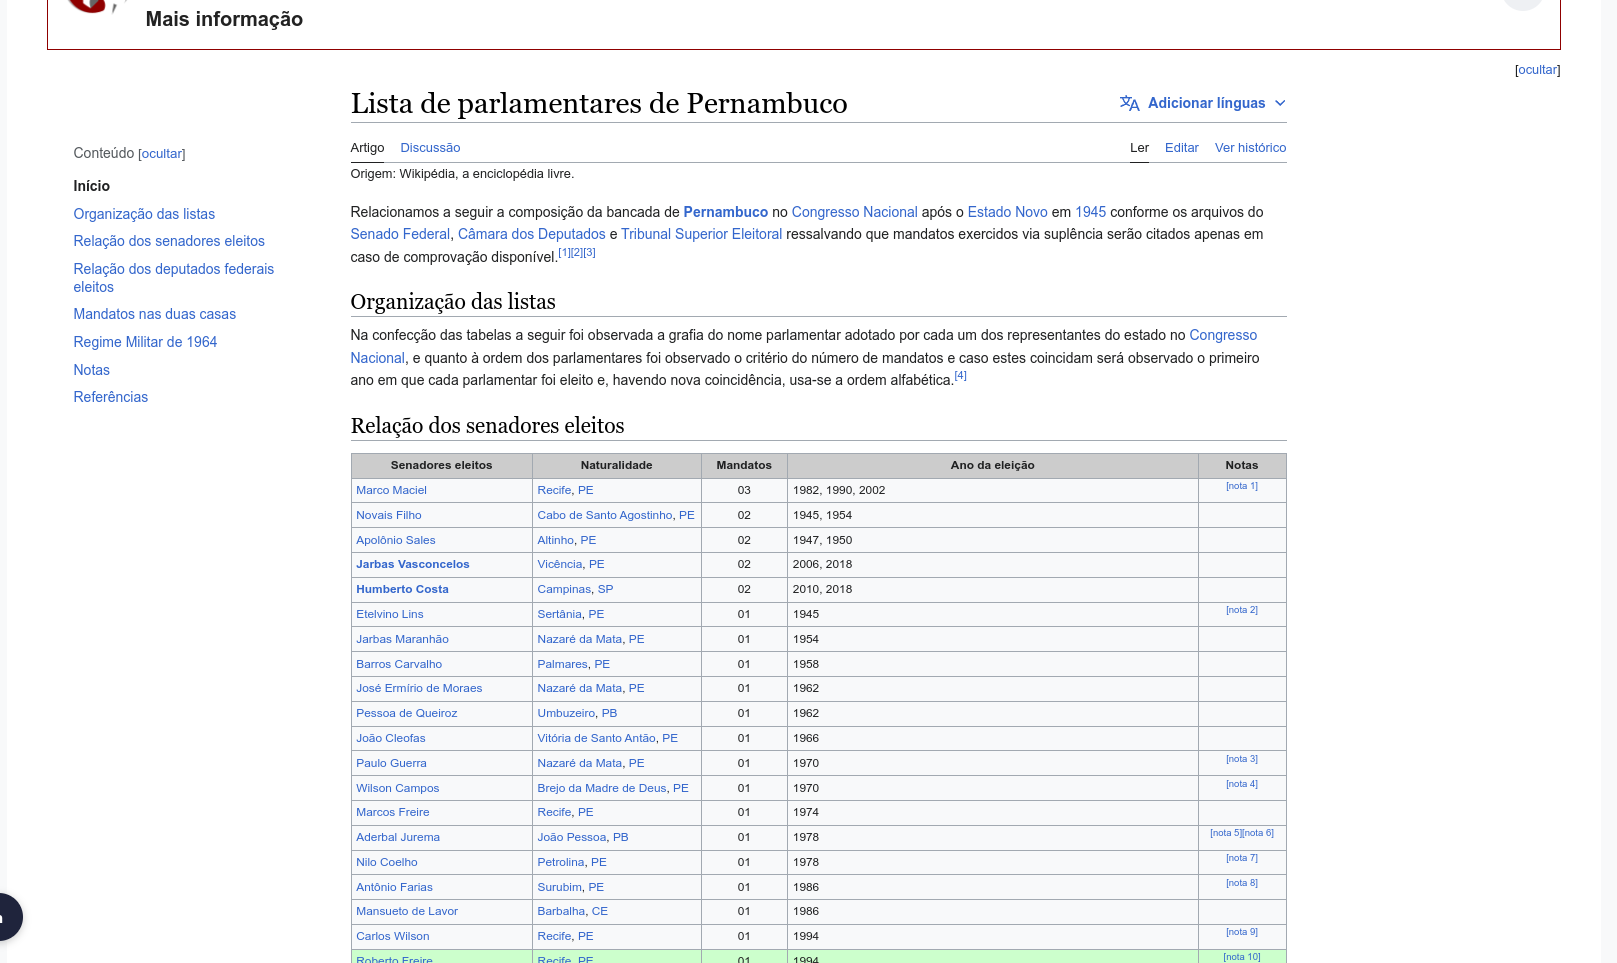

### Etapas de configuração

In [2]:
# URL do Wikipedia
url = (
  "https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Pernambuco"
)

Importação da biblioteca:

In [3]:
from requests_html import HTMLSession

Criação da seção de raspagem de dados. Ela se assemelha com a criação de uma nova aba no navegador.

In [4]:
session = HTMLSession()

Vamos utilizar o método `get()`, para acessar uma URL na internet. Igual como fizemos na semana anterior com a biblioteca `requests`.

In [5]:
response_wikipedia = session.get(url)

Igual como fizemos com o `requests`, aqui também podemos verificar se a requisição foi um sucesso:

In [11]:
response_wikipedia.status_code

200

### Acessando informação na página

Será que seria possível acessar de forma automática todas as urls presentes nessa tabela:

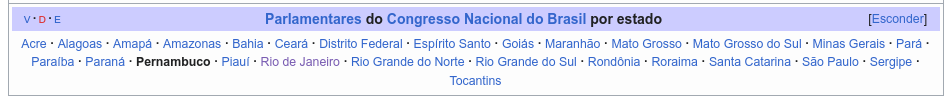

Sim seria! 

Para fazer isso precisamos antes encontrar a tabela na página. Uma forma de fazer isso, é pesquisando pelo título da tabela:

In [12]:
response_wikipedia.html.find(
    "table", 
    containing='Parlamentares do Congresso Nacional do Brasil por estado',
    first=True,
)

<Element 'table' class=('nowraplinks', 'collapsible', 'show', 'navbox-inner') style='border-spacing:0;background:transparent;color:inherit'>

Mas isso não é suficiente para encontrar as URLs que levam para a lista de parlamentares por estado :( 

No HTML um **hiperlink** é definido com a tag `<a>...</a>`. Então, o que podemos fazer é pesquisar por essa tag dentro da tabela:

Mais informações sobre a tag `<a>` [acesse](https://www.w3schools.com/tags/tag_a.asp).

In [13]:
response_wikipedia.html.find(
    "table", 
    containing='Parlamentares do Congresso Nacional do Brasil por estado',
    first=True,
).find("a")

[<Element 'a' href='/wiki/Predefini%C3%A7%C3%A3o:Parlamentares_do_Brasil' title='Predefinição:Parlamentares do Brasil'>,
 <Element 'a' href='/w/index.php?title=Predefini%C3%A7%C3%A3o_Discuss%C3%A3o:Parlamentares_do_Brasil&action=edit&redlink=1' class=('new',) title='Predefinição Discussão:Parlamentares do Brasil (página não existe)'>,
 <Element 'a' class=('external', 'text') href='https://pt.wikipedia.org/w/index.php?title=Predefini%C3%A7%C3%A3o:Parlamentares_do_Brasil&action=edit'>,
 <Element 'a' href='/wiki/Parlamentar' title='Parlamentar'>,
 <Element 'a' href='/wiki/Congresso_Nacional_do_Brasil' title='Congresso Nacional do Brasil'>,
 <Element 'a' href='/wiki/Lista_de_parlamentares_do_Acre' title='Lista de parlamentares do Acre'>,
 <Element 'a' href='/wiki/Lista_de_parlamentares_de_Alagoas' title='Lista de parlamentares de Alagoas'>,
 <Element 'a' href='/wiki/Lista_de_parlamentares_do_Amap%C3%A1' title='Lista de parlamentares do Amapá'>,
 <Element 'a' href='/wiki/Lista_de_parlamenta

No comando anterior, procuramos por todos os elementos que possuíssem a tag `<a>`, retornando assim uma lista com todos os elementos e o conteúdo dentro da tag

In [6]:
links = response_wikipedia.html.find(
    "table", 
    containing='Parlamentares do Congresso Nacional do Brasil por estado',
    first=True,
).find("a")

Para acessar apenas a url, precisamos chamar o atributo `absolute_links`

In [20]:
links[0].absolute_links

{'https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Parlamentares_do_Brasil'}

E para obter a string, usamos o `pop()`

In [21]:
links[0].absolute_links.pop()

'https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Parlamentares_do_Brasil'

Com isso, para obter todas as urls da tabela `Parlamentares do Congresso Nacional do Brasil por estado`, vamos filtrar por urls que contenham `Lista_de`:

In [141]:
for link in links:
    if link.absolute_links and "Lista_de" in link.absolute_links.pop():
        print(link.absolute_links)

{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Acre'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Alagoas'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Amap%C3%A1'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Amazonas'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_da_Bahia'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Cear%C3%A1'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Distrito_Federal_(Brasil)'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Esp%C3%ADrito_Santo'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Goi%C3%A1s'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Maranh%C3%A3o'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Mato_Grosso'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Mato_Grosso_do_Sul'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Minas_Gerais'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_

Uma forma de armazenar as urls em uma lista em poucas linhas é com a **compreensão de lista** (list comprehension):

In [7]:
links = [
    link.absolute_links.pop()
    for link in links 
    if link.absolute_links and ("Lista_de" in link.absolute_links.pop())
]

In [23]:
links

['https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Acre',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Alagoas',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Amap%C3%A1',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Amazonas',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_da_Bahia',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Cear%C3%A1',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Distrito_Federal_(Brasil)',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Esp%C3%ADrito_Santo',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Goi%C3%A1s',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Maranh%C3%A3o',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Mato_Grosso',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Mato_Grosso_do_Sul',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Minas_Gerais',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_

### Explorando mais a página

O `find()` nós permite buscar por elementos na página HTML, esse elemento pode ser um **tipo de tag** ou um padrão definido por um **tipo de seletor (CSS ou XPath)**.

Nesse curso o `CSS` e o `XPath` não são abordados com aprofundamento. Mas de forma resumida, são padrões relativamente complexos e robustos que permitem consultar elementos expecificos dentro de uma página HTML.

* [Referência rápida de CSS](https://www.w3schools.com/cssref/css_selectors.asp)
* [Referência rápida de XPath](https://www.w3schools.com/xml/xpath_syntax.asp)

#### Buscando por tabela

Para encontrar tabelas, podemos pesquisar por elementos que sejam do tipo [table](https://www.w3schools.com/tags/tag_table.asp).

Quando pesquisamos por todos os elementos do tipo `table` na página do Wikipedia, encontrams 4 tabelas. Duas delas são da classe `wikitable` e as outras duas do tipo `nowraplinks`.

In [23]:
response_wikipedia.html.find("table")

[<Element 'table' class=('wikitable',) style='font-size: 85%;'>,
 <Element 'table' class=('wikitable',) style='font-size: 85%;'>,
 <Element 'table' class=('nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner') style='border-spacing:0;background:transparent;color:inherit'>,
 <Element 'table' class=('nowraplinks', 'collapsible', 'show', 'navbox-inner') style='border-spacing:0;background:transparent;color:inherit'>]

Quando olhamos para o HTML em detalhes, vemos que a tabela `Relação dos senadores eleitos` é o primeiro elemento `table` da classe `"wikitable"` na página:

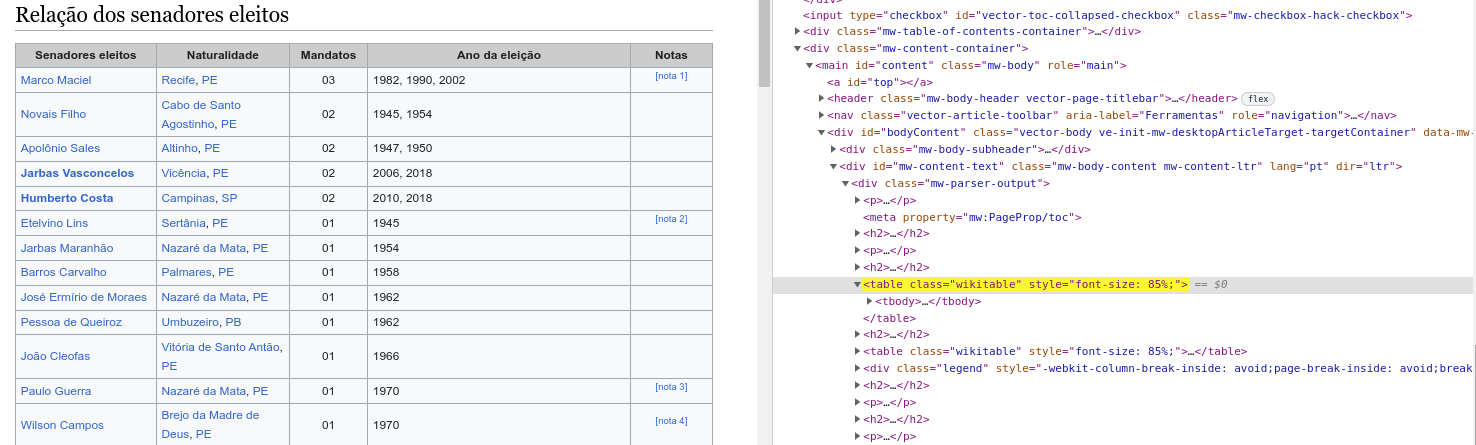

Sendo assim, caso queiras a lista de senadores eleitos em Pernambuco, podemos executar:

In [8]:
tb_senadores_eleitos = response_wikipedia.html.find("table", first=True) 
# Passamos o first=True nesse caso, porque queremos apenas a primeira tabela.
tb_senadores_eleitos

<Element 'table' class=('wikitable',) style='font-size: 85%;'>

Mas ainda não conseguimos, por exemplo, acessar a lista de senadores eleitos :( 

Como podemos fazer isso?

Uma opção é a seguinte:

In [21]:
tb_senadores_eleitos.text

'Senadores eleitos\nNaturalidade\nMandatos\nAno da eleição\nNotas\nMarco Maciel\nRecife, PE\n03\n1982, 1990, 2002\n[nota 1]\nNovais Filho\nCabo de Santo Agostinho, PE\n02\n1945, 1954\nApolônio Sales\nAltinho, PE\n02\n1947, 1950\nJarbas Vasconcelos\nVicência, PE\n02\n2006, 2018\nHumberto Costa\nCampinas, SP\n02\n2010, 2018\nEtelvino Lins\nSertânia, PE\n01\n1945\n[nota 2]\nJarbas Maranhão\nNazaré da Mata, PE\n01\n1954\nBarros Carvalho\nPalmares, PE\n01\n1958\nJosé Ermírio de Moraes\nNazaré da Mata, PE\n01\n1962\nPessoa de Queiroz\nUmbuzeiro, PB\n01\n1962\nJoão Cleofas\nVitória de Santo Antão, PE\n01\n1966\nPaulo Guerra\nNazaré da Mata, PE\n01\n1970\n[nota 3]\nWilson Campos\nBrejo da Madre de Deus, PE\n01\n1970\n[nota 4]\nMarcos Freire\nRecife, PE\n01\n1974\nAderbal Jurema\nJoão Pessoa, PB\n01\n1978\n[nota 5][nota 6]\nNilo Coelho\nPetrolina, PE\n01\n1978\n[nota 7]\nAntônio Farias\nSurubim, PE\n01\n1986\n[nota 8]\nMansueto de Lavor\nBarbalha, CE\n01\n1986\nCarlos Wilson\nRecife, PE\n01\n19

Porém apenas acessar o texto de uma tabela sem formatação não é muito útil para análises e pouco legível para humanos. 

Outra forma de acessar essas informações de forma mais legível é a seguinte:

##### 1. Acessando as linhas da tabela `tb_senadores_eleitos` (tag [tr](https://www.w3schools.com/tags/tag_tr.asp))

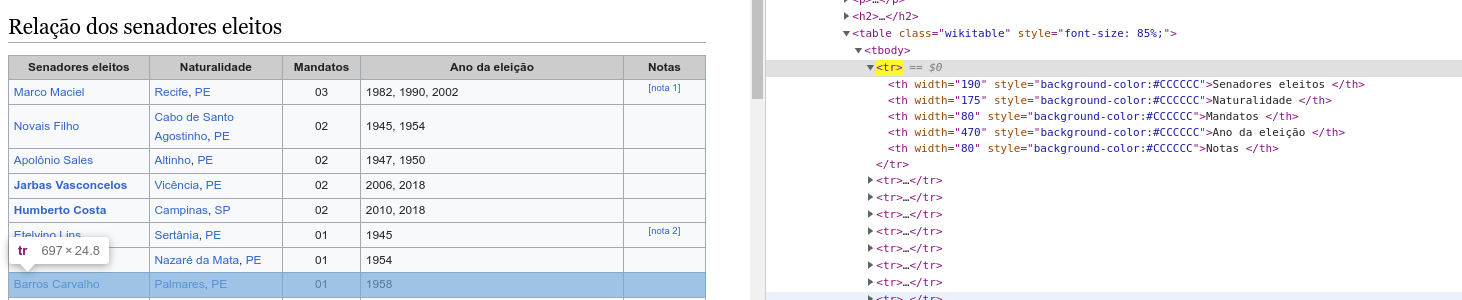

In [9]:
linhas_senadores_eleitos = tb_senadores_eleitos.find("tr")
linhas_senadores_eleitos

[<Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >]

##### 2. Acessando o cabeçalho da tabela (tag [th](https://www.w3schools.com/tags/tag_th.asp))

> O cabeçalho sempre será a primeira linha, no caso, `linhas_senadores_eleitos[0]

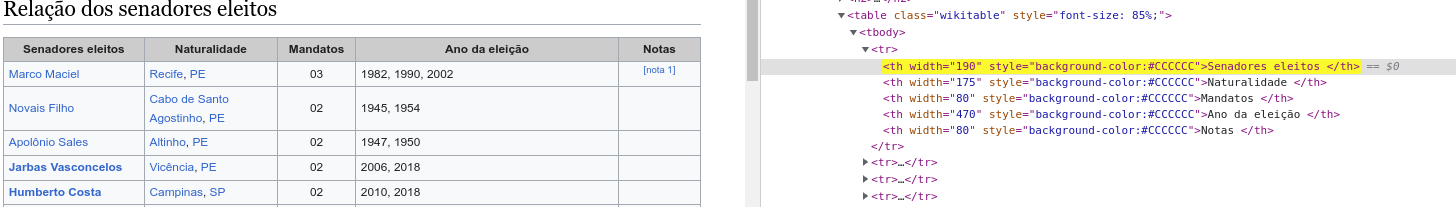

In [10]:
primeira_linha = tb_senadores_eleitos.find("tr")[0]
primeira_linha

<Element 'tr' >

In [11]:
cabecalho = primeira_linha.find("th")
cabecalho

[<Element 'th' width='190' style='background-color:#CCCCCC'>,
 <Element 'th' width='175' style='background-color:#CCCCCC'>,
 <Element 'th' width='80' style='background-color:#CCCCCC'>,
 <Element 'th' width='470' style='background-color:#CCCCCC'>,
 <Element 'th' width='80' style='background-color:#CCCCCC'>]

In [12]:
cabecalho = [col.text for col in cabecalho]
cabecalho

['Senadores eleitos', 'Naturalidade', 'Mandatos', 'Ano da eleição', 'Notas']

##### 3. Acessando o conteúdo das linhas (tag [td](https://www.w3schools.com/tags/tag_td.asp))

Dentro de cada linha (tag tr) temos uma quantidade X de colunas (nesse caso 5 colunas). Essa informação fica dentro da tag `td`. Sendo assim, para acessar o conteúdo das linhas, precisamos antes acessar as `td` que estão dentro delas.

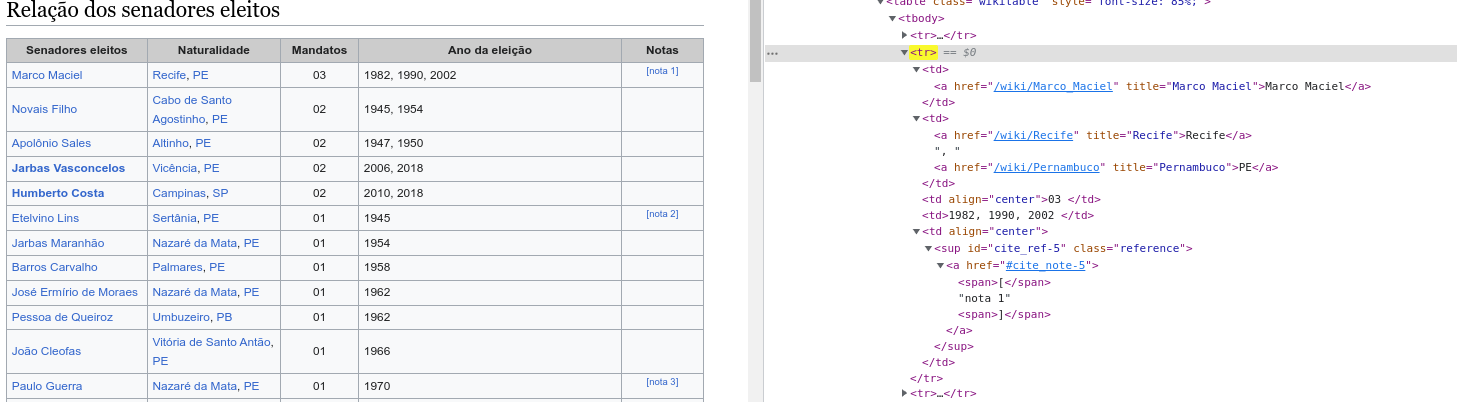

In [45]:
linhas_senadores_eleitos[1:]

[<Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >,
 <Element 'tr' >]

Uma forma de acessar o conteúdo das tags `td` é utilizando o `find("td")`:

In [18]:
linhas_senadores_eleitos[1]

<Element 'tr' >

In [19]:
linhas_senadores_eleitos[1].find("td")

[<Element 'td' >,
 <Element 'td' >,
 <Element 'td' align='center'>,
 <Element 'td' >,
 <Element 'td' align='center'>]

Como queremos ler todas as linhas, podemos fazer da seguinte forma:

In [20]:
linhas = []
for linha in linhas_senadores_eleitos[1:]:
    linha_conteudo = []
    for coluna in linha.find("td"):
        linha_conteudo.append(coluna.text)
    linhas.append(linha_conteudo)
    
linhas

[['Marco Maciel', 'Recife, PE', '03', '1982, 1990, 2002', '[nota 1]'],
 ['Novais Filho', 'Cabo de Santo Agostinho, PE', '02', '1945, 1954', ''],
 ['Apolônio Sales', 'Altinho, PE', '02', '1947, 1950', ''],
 ['Jarbas Vasconcelos', 'Vicência, PE', '02', '2006, 2018', ''],
 ['Humberto Costa', 'Campinas, SP', '02', '2010, 2018', ''],
 ['Etelvino Lins', 'Sertânia, PE', '01', '1945', '[nota 2]'],
 ['Jarbas Maranhão', 'Nazaré da Mata, PE', '01', '1954', ''],
 ['Barros Carvalho', 'Palmares, PE', '01', '1958', ''],
 ['José Ermírio de Moraes', 'Nazaré da Mata, PE', '01', '1962', ''],
 ['Pessoa de Queiroz', 'Umbuzeiro, PB', '01', '1962', ''],
 ['João Cleofas', 'Vitória de Santo Antão, PE', '01', '1966', ''],
 ['Paulo Guerra', 'Nazaré da Mata, PE', '01', '1970', '[nota 3]'],
 ['Wilson Campos', 'Brejo da Madre de Deus, PE', '01', '1970', '[nota 4]'],
 ['Marcos Freire', 'Recife, PE', '01', '1974', ''],
 ['Aderbal Jurema', 'João Pessoa, PB', '01', '1978', '[nota 5][nota 6]'],
 ['Nilo Coelho', 'Petroli

##### 4. Trabalhando com os dados

Para conseguir fazer análise com esses dados, podemos utilizar o nosso querido **pandas**

In [21]:
import pandas as pd

In [24]:
df_senados_eleitos = pd.DataFrame(linhas, columns=cabecalho)
df_senados_eleitos

,Senadores eleitos,Naturalidade,Mandatos,Ano da eleição,Notas
0,Marco Maciel,"Recife, PE",03,"1982, 1990, 2002",[nota 1]
1,Novais Filho,"Cabo de Santo Agostinho, PE",02,"1945, 1954",
2,Apolônio Sales,"Altinho, PE",02,"1947, 1950",
3,Jarbas Vasconcelos,"Vicência, PE",02,"2006, 2018",
4,Humberto Costa,"Campinas, SP",02,"2010, 2018",
5,Etelvino Lins,"Sertânia, PE",01,1945,[nota 2]
6,Jarbas Maranhão,"Nazaré da Mata, PE",01,1954,
7,Barros Carvalho,"Palmares, PE",01,1958,
8,José Ermírio de Moraes,"Nazaré da Mata, PE",01,1962,
9,Pessoa de Queiroz,"Umbuzeiro, PB",01,1962,


Após criado o dataframe, poderíamos agora fazer algumas análises.

# pandas

Como no Python temos diversas formas de fazer a mesma coisa, aqui você verá mais uma :D 

O pandas possui uma função chamada [read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html), que busca por tabelas na página HTML. Essa página pode ser um arquivo no seu computador ou uma página na internet.

In [40]:
import pandas as pd

url = (
  "https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Pernambuco"
)

tables = pd.read_html(url)
tables

[          Senadores eleitos                 Naturalidade      Mandatos  \
 0              Marco Maciel                   Recife, PE            03   
 1              Novais Filho  Cabo de Santo Agostinho, PE            02   
 2            Apolônio Sales                  Altinho, PE            02   
 3        Jarbas Vasconcelos                 Vicência, PE            02   
 4            Humberto Costa                 Campinas, SP            02   
 5             Etelvino Lins                 Sertânia, PE            01   
 6           Jarbas Maranhão           Nazaré da Mata, PE            01   
 7           Barros Carvalho                 Palmares, PE            01   
 8    José Ermírio de Moraes           Nazaré da Mata, PE            01   
 9         Pessoa de Queiroz                Umbuzeiro, PB            01   
 10             João Cleofas   Vitória de Santo Antão, PE            01   
 11             Paulo Guerra           Nazaré da Mata, PE            01   
 12            Wilson Cam

Como podemos ver, o pandas buscou por todas as tabelas dentro da página da Wikipedia:

In [41]:
print(f'Total tables: {len(tables)}')

Total tables: 4


Podemos ver com mais calma quais as tabelas ele obteve assim:

In [44]:
for id, table in enumerate(tables):
    print(f"Tabela {id}")
    print(table.info())
    print("\n")

Tabela 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Senadores eleitos  25 non-null     object
 1   Naturalidade       25 non-null     object
 2   Mandatos           25 non-null     object
 3   Ano da eleição     25 non-null     object
 4   Notas              10 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB
None


Tabela 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Deputados federais eleitos  187 non-null    object
 1   Naturalidade                187 non-null    object
 2   Mandatos                    187 non-null    object
 3   Ano da eleição              187 non-null    object
 4   Notas                       33 non-null     object
dtypes: 

Como estávamos trabalhando com os dados de senadores, então podemos filtrar pela posição `0` que corresponde a tabela de **senadores eleitos**:

In [45]:
tables[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Senadores eleitos  25 non-null     object
 1   Naturalidade       25 non-null     object
 2   Mandatos           25 non-null     object
 3   Ano da eleição     25 non-null     object
 4   Notas              10 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [47]:
tables[0]

,Senadores eleitos,Naturalidade,Mandatos,Ano da eleição,Notas
0,Marco Maciel,"Recife, PE",03,"1982, 1990, 2002",[nota 1]
1,Novais Filho,"Cabo de Santo Agostinho, PE",02,"1945, 1954",NaN
2,Apolônio Sales,"Altinho, PE",02,"1947, 1950",NaN
3,Jarbas Vasconcelos,"Vicência, PE",02,"2006, 2018",NaN
4,Humberto Costa,"Campinas, SP",02,"2010, 2018",NaN
5,Etelvino Lins,"Sertânia, PE",01,1945,[nota 2]
6,Jarbas Maranhão,"Nazaré da Mata, PE",01,1954,NaN
7,Barros Carvalho,"Palmares, PE",01,1958,NaN
8,José Ermírio de Moraes,"Nazaré da Mata, PE",01,1962,NaN
9,Pessoa de Queiroz,"Umbuzeiro, PB",01,1962,NaN


In [48]:
tables[0].groupby("Naturalidade")["Ano da eleição"].count().sort_values(ascending=False)

Naturalidade
Recife, PE                     7
Nazaré da Mata, PE             3
Petrolina, PE                  2
Altinho, PE                    1
Barbalha, CE                   1
Brejo da Madre de Deus, PE     1
Cabo de Santo Agostinho, PE    1
Campinas, SP                   1
Fonte:[1][3]                   1
João Pessoa, PB                1
Palmares, PE                   1
Sertânia, PE                   1
Surubim, PE                    1
Umbuzeiro, PB                  1
Vicência, PE                   1
Vitória de Santo Antão, PE     1
Name: Ano da eleição, dtype: int64